# Training Model - SMOTE

# Import Library

In [2]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Read Data

In [3]:
#Read data X_train dan y_sm hasil dari data preparation
X_sm_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_sm_clean.pkl") 
y_sm = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_sm.pkl")

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_valid_clean.pkl")
y_valid = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_valid.pkl")

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_test_clean.pkl")
y_test = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_test.pkl")

In [4]:
X_sm_clean

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.005830,1.402566,-1.408523,1.418607,-0.022073,1,1,0,0,0,1,0,1
1,0.499235,1.601247,1.519890,0.617282,-1.347378,2,1,1,0,0,1,1,0
2,-0.673974,-0.782920,0.787787,1.187554,-1.347378,2,1,1,0,0,1,1,0
3,-2.296730,-0.981601,1.153838,-0.959313,-0.070469,1,0,1,0,1,0,0,1
4,1.321578,0.210483,-1.042471,-1.408218,0.757994,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,0.365275,1.104545,-1.042471,-1.699851,1.099824,1,0,0,0,1,0,1,0
11132,-0.980921,1.700587,-1.042471,1.031187,1.371110,1,0,1,1,0,0,0,0
11133,1.424574,0.309823,-0.676420,-1.238966,0.445339,1,1,1,0,0,0,0,0
11134,-1.196345,0.905865,-1.408523,0.071839,-1.347378,2,1,1,1,0,0,0,0


In [5]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
11131    1
11132    1
11133    1
11134    1
11135    1
Name: Exited, Length: 11136, dtype: int64

## Baseline Model

In [6]:
y_sm.value_counts(normalize = True)
# baseline akurasi = 80%
# Before Smote Sampling

0    0.5
1    0.5
Name: Exited, dtype: float64

In [7]:
y_baseline_predict = y_sm.mean()
y_baseline_predict

0.5

## Logistic Regression

In [8]:
# Build Logistic Regression
logreg_awal = LogisticRegression(random_state = 123)

In [9]:
# fit Logistic Regression
logreg_awal.fit(X_sm_clean, y_sm)

LogisticRegression(random_state=123)

In [10]:
# Melihat Score dari model logreg
logreg_awal.score(X_sm_clean, y_sm)

0.8369252873563219

In [11]:
#Prediksi Logreg
logreg_pred = logreg_awal.predict(X_test_clean)

In [12]:
#Melihat Classification report
print(classification_report(y_test, logreg_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1424
           1       0.50      0.47      0.48       376

    accuracy                           0.79      1800
   macro avg       0.68      0.67      0.67      1800
weighted avg       0.79      0.79      0.79      1800



In [13]:
#Melihat score data train, validation dan test
print("Train_Score = ", logreg_awal.score(X_sm_clean, y_sm), 
      "Valid_Score = ",logreg_awal.score(X_valid_clean, y_valid),
      "Test_Score = ", logreg_awal.score(X_test_clean, y_test))

Train_Score =  0.8369252873563219 Valid_Score =  0.8108333333333333 Test_Score =  0.7894444444444444


## Tuning Parameter Logistic Regression

In [14]:
# Build Logistic Regression
logreg = LogisticRegression(random_state = 123)

In [15]:
# Membentuk parameter untuk eksperimentasi
lr_param_grid = {
    'C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty' : ['l1', 'l2', 'elasticnet','none']
}

In [16]:
# Cross Validation menggunakan GridsearchCV
lr_grid = GridSearchCV(LogisticRegression(random_state = 123), lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [17]:
#Fitting Model lr grid
lr_grid.fit(X_sm_clean, y_sm)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.642 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.822 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.859 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.858 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1,

[CV 5/5] END .C=0.01, penalty=none, solver=saga;, score=0.901 total time=   0.3s
[CV 1/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.615 total time=   0.0s
[CV 2/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.829 total time=   0.0s
[CV 3/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.898 total time=   0.0s
[CV 4/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.885 total time=   0.0s
[CV 5/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.899 total time=   0.0s
[CV 1/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C

[CV 4/5] END .C=0.05, penalty=none, solver=saga;, score=0.889 total time=   0.3s
[CV 5/5] END .C=0.05, penalty=none, solver=saga;, score=0.901 total time=   0.3s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.611 total time=   0.1s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.830 total time=   0.1s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.899 total time=   0.1s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.886 total time=   0.1s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.901 total time=   0.1s
[CV 1/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1

[CV 4/5] END ..C=0.1, penalty=none, solver=saga;, score=0.889 total time=   0.2s
[CV 5/5] END ..C=0.1, penalty=none, solver=saga;, score=0.901 total time=   0.2s
[CV 1/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.614 total time=   0.2s
[CV 2/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.828 total time=   0.4s
[CV 3/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.900 total time=   0.4s
[CV 4/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.888 total time=   0.4s
[CV 5/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.901 total time=   0.4s
[CV 1/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.5

[CV 4/5] END ..C=0.5, penalty=none, solver=saga;, score=0.889 total time=   0.3s
[CV 5/5] END ..C=0.5, penalty=none, solver=saga;, score=0.901 total time=   0.2s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.614 total time=   0.4s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.828 total time=   0.6s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.900 total time=   0.6s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.888 total time=   0.7s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.901 total time=   0.5s
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, pen

[CV 5/5] END ....C=1, penalty=none, solver=saga;, score=0.901 total time=   0.2s
[CV 1/5] END .C=5, penalty=l1, solver=liblinear;, score=0.614 total time=   0.8s
[CV 2/5] END .C=5, penalty=l1, solver=liblinear;, score=0.828 total time=   1.5s
[CV 3/5] END .C=5, penalty=l1, solver=liblinear;, score=0.900 total time=   1.9s
[CV 4/5] END .C=5, penalty=l1, solver=liblinear;, score=0.889 total time=   1.6s
[CV 5/5] END .C=5, penalty=l1, solver=liblinear;, score=0.901 total time=   1.7s
[CV 1/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=5, pen

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [18]:
#Melihat parameter terbaik untuk model
print(lr_grid.best_params_)

{'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}


In [19]:
#Input parameter terbaik hasil GridsearchCV
lr_grid_cv  = LogisticRegression(C = lr_grid.best_params_["C"],
                                 penalty = lr_grid.best_params_["penalty"],
                                 solver = lr_grid.best_params_["solver"])

#Kembali fitting model
lr_grid_cv.fit(X_sm_clean, y_sm)

LogisticRegression(C=5, solver='newton-cg')

In [20]:
print(f"Training Data Score: {lr_grid_cv.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {lr_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lr_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8369252873563219
Validating Data Score: 0.8116666666666666
Testing Data Score: 0.7905555555555556


In [21]:
#Prediksi dengan menggunakan data test
logregtun_pred = lr_grid_cv.predict(X_test_clean)

In [22]:
#Melihat Classification report
print(classification_report(y_test, logregtun_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1424
           1       0.50      0.47      0.48       376

    accuracy                           0.79      1800
   macro avg       0.68      0.67      0.68      1800
weighted avg       0.79      0.79      0.79      1800



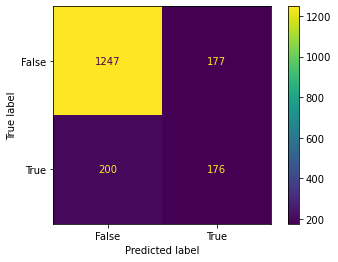

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, logregtun_pred, display_labels = [False, True])
plt.show()

## Support Vector Classifier

In [24]:
svc_ori = SVC(random_state = 123)

In [25]:
# fit Support Vector Classifier
svc_ori.fit(X_sm_clean, y_sm)

SVC(random_state=123)

In [26]:
#Cek Score model SVC
svc_ori.score(X_sm_clean, y_sm)

0.883441091954023

In [27]:
svc_predict = svc_ori.predict(X_test_clean)

In [28]:
print(classification_report(y_test, svc_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1424
           1       0.62      0.59      0.60       376

    accuracy                           0.84      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.84      0.84      0.84      1800



In [29]:
print(f"Training Data Score: {svc_ori.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {svc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.883441091954023
Validating Data Score: 0.86
Testing Data Score: 0.8377777777777777


## Tuning Parameter SVC

In [30]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'gamma': ['scale', 'auto']
             }

In [31]:
#Membentuk parameter untuk eksperimentasi
svc_grid = GridSearchCV(SVC(random_state = 123), 
                        param_grid, 
                        verbose=3, 
                        cv= 5, 
                        n_jobs=4, 
                        scoring='accuracy')

In [32]:
#Melakukan fitting model gridsearchcv
svc_grid.fit(X_sm_clean, y_sm)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=4,
             param_grid={'C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [33]:
#Melihat parameter terbaik
svc_grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [34]:
#Melakukan input parameter terbaik hasil gridsearch
svc_grid_cv  = SVC(kernel = svc_grid.best_params_["kernel"],
                   gamma = svc_grid.best_params_["gamma"],
                   C = svc_grid.best_params_["C"]
                  )

In [35]:
svc_grid_cv.fit(X_sm_clean, y_sm)

SVC(C=0.5)

In [36]:
print(f"Training Data Score: {svc_grid_cv.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {svc_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8781429597701149
Validating Data Score: 0.8541666666666666
Testing Data Score: 0.8416666666666667


In [37]:
svc_pred_cv = svc_grid_cv.predict(X_test_clean)

In [38]:
print(classification_report(y_test, svc_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1424
           1       0.63      0.59      0.61       376

    accuracy                           0.84      1800
   macro avg       0.76      0.75      0.75      1800
weighted avg       0.84      0.84      0.84      1800



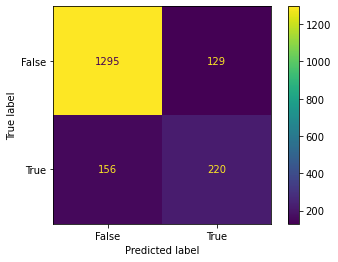

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred_cv, display_labels = [False, True])
plt.show()

## Decisiontree

In [40]:
# Model Decision Tree
decTree = DecisionTreeClassifier(random_state = 123)

In [41]:
# Fitting model
decTree.fit(X_sm_clean, y_sm)

DecisionTreeClassifier(random_state=123)

In [42]:
# Model score
decTree.score(X_sm_clean, y_sm)

1.0

In [43]:
#Prediksi data menggunakan data test
dectree_predict = decTree.predict(X_test_clean)

In [44]:
#Melihat Classification report
print(classification_report(y_test, dectree_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1424
           1       0.48      0.63      0.54       376

    accuracy                           0.78      1800
   macro avg       0.68      0.72      0.70      1800
weighted avg       0.81      0.78      0.79      1800



In [45]:
#Melihat score prediksi dari data train, valid dan test
print(f"Training Data Score: {decTree.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {decTree.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.7733333333333333
Testing Data Score: 0.7777777777777778


## Tuning Parameter Decisiontree

In [46]:
# Buat parameter untuk eksperimen
decTree_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                "criterion": ["gini", "entropy", "log_loss"],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],}

In [47]:
# Buat plan eksperimentasi
random_decTree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                              param_grid = decTree_param,
                              cv = 5,
                              scoring = "accuracy") 

In [48]:
# Lakukan fitting eksperimentasi
random_decTree.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [49]:
random_decTree.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [50]:
# Buat model
best_decTree = DecisionTreeClassifier(max_depth = random_decTree.best_params_["max_depth"],
                                      criterion = random_decTree.best_params_["criterion"],
                                      min_samples_leaf = random_decTree.best_params_["min_samples_leaf"],
                                      min_samples_split = random_decTree.best_params_["min_samples_split"],
                                      random_state = 123)

In [51]:
# Fit model
best_decTree.fit(X_sm_clean, y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       random_state=123)

In [52]:
# Cek Train data
best_decTree.score(X_sm_clean, y_sm)

0.8808369252873564

In [53]:
y_predict_dectree = best_decTree.predict(X_test_clean)

In [54]:
print(classification_report(y_test, y_predict_dectree))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1424
           1       0.54      0.66      0.59       376

    accuracy                           0.81      1800
   macro avg       0.72      0.75      0.73      1800
weighted avg       0.83      0.81      0.82      1800



In [55]:
print(f"Training Data Score: {best_decTree.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {best_decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {best_decTree.score(X_test_clean, y_test)}")

Training Data Score: 0.8808369252873564
Validating Data Score: 0.8191666666666667
Testing Data Score: 0.8111111111111111


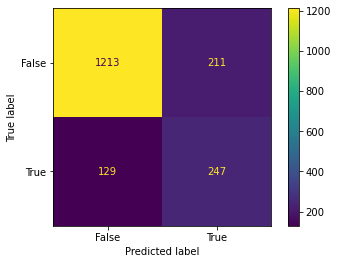

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dectree, display_labels = [False, True])
plt.show()

## Randomforest Classifier

In [57]:
# Build random forest
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6, 
                                       min_samples_leaf=8,
                                       random_state = 123)

In [58]:
random_forest.fit(X_sm_clean, y_sm)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [59]:
random_forest.fit(X_sm_clean, y_sm)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [60]:
# Model score
random_forest.score(X_sm_clean, y_sm)

0.8658405172413793

In [61]:
y_pred_rf = random_forest.predict(X_test_clean)

In [62]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1424
           1       0.54      0.67      0.60       376

    accuracy                           0.81      1800
   macro avg       0.72      0.76      0.74      1800
weighted avg       0.83      0.81      0.82      1800



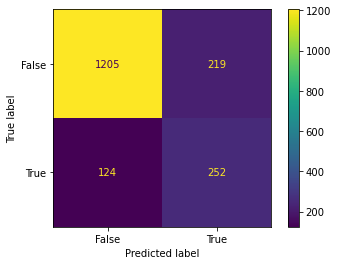

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels = [False, True])
plt.show()

## Tuning Parameter Randomforest

In [64]:
# Buat parameter untuk eksperimen
random_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'n_estimators': [50, 100, 200],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                "criterion": ["gini", "entropy"]
                }

In [65]:
# Buat plan eksperimentasi
random_forestcls = GridSearchCV(estimator = RandomForestClassifier(random_state=123),
                                param_grid = random_param,
                                cv = 5,
                                scoring = "accuracy") 

In [66]:
# Lakukan fitting eksperimentasi
random_forestcls.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [67]:
random_forestcls.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [68]:
# Buat model
random_forestcls_cv = RandomForestClassifier(max_depth = random_forestcls.best_params_["max_depth"],
                                             criterion = random_forestcls.best_params_["criterion"],
                                             n_estimators = random_forestcls.best_params_["n_estimators"],
                                             min_samples_leaf = random_forestcls.best_params_["min_samples_leaf"],
                                             min_samples_split = random_forestcls.best_params_["min_samples_split"],
                                             random_state = 123)

In [69]:
# Fit model
random_forestcls_cv.fit(X_sm_clean, y_sm)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=200,
                       random_state=123)

In [70]:
predict_randomcls_cv = random_forestcls_cv.predict(X_test_clean)

In [71]:
print(classification_report(y_test, predict_randomcls_cv))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1424
           1       0.60      0.65      0.62       376

    accuracy                           0.84      1800
   macro avg       0.75      0.77      0.76      1800
weighted avg       0.84      0.84      0.84      1800



In [72]:
print(f"Training Data Score: {random_forestcls_cv.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {random_forestcls_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.9568067528735632
Validating Data Score: 0.8516666666666667
Testing Data Score: 0.8366666666666667


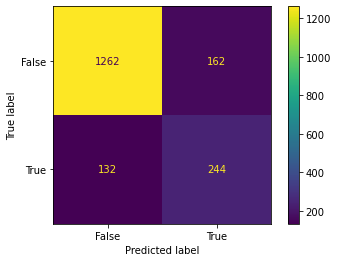

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels = [False, True])
plt.show()

## Ridge Classifier

In [74]:
ridge = RidgeClassifier(random_state = 123) #create a ridge classifier object

In [75]:
ridge.fit(X_sm_clean, y_sm) #train the model

RidgeClassifier(random_state=123)

In [76]:
ridge.score(X_sm_clean, y_sm)

0.8301005747126436

In [77]:
pred_ridge = ridge.predict(X_test_clean)

In [78]:
print(classification_report(y_test, pred_ridge, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1424
           1       0.50      0.44      0.47       376

    accuracy                           0.79      1800
   macro avg       0.68      0.66      0.67      1800
weighted avg       0.78      0.79      0.79      1800



In [79]:
print(f"Training Data Score: {ridge.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {ridge.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge.score(X_test_clean, y_test)}")

Training Data Score: 0.8301005747126436
Validating Data Score: 0.8091666666666667
Testing Data Score: 0.7911111111111111


## Tuning Parameter Ridge Classifier

In [80]:
clf_ridge = RidgeClassifier(random_state = 123)

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

ridge_cv = GridSearchCV(estimator=clf_ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [81]:
ridge_cv.fit(X_sm_clean, y_sm)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=RidgeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='accuracy')

In [82]:
ridge_cv.best_params_

{'alpha': 0.5}

In [83]:
# Buat model
ridge_cv = RidgeClassifier(alpha = ridge_cv.best_params_["alpha"],
                           random_state = 123)

In [84]:
# Fit model
ridge_cv.fit(X_sm_clean, y_sm)

RidgeClassifier(alpha=0.5, random_state=123)

In [85]:
# Cek Test data
ridge_cv.score(X_sm_clean, y_sm)

0.830010775862069

In [86]:
predict_ridgecv = ridge_cv.predict(X_test_clean)

In [87]:
print(classification_report(y_test, predict_ridgecv))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1424
           1       0.50      0.44      0.47       376

    accuracy                           0.79      1800
   macro avg       0.68      0.66      0.67      1800
weighted avg       0.78      0.79      0.79      1800



In [88]:
print(f"Training Data Score: {ridge_cv.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {ridge_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.830010775862069
Validating Data Score: 0.8091666666666667
Testing Data Score: 0.7911111111111111


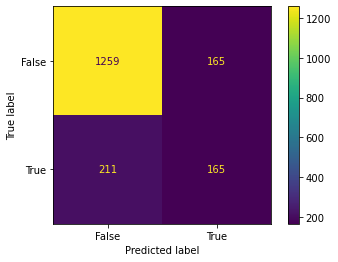

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_ridgecv, display_labels = [False, True])
plt.show()

## KNeighborsClassifier

In [90]:
# Build KNeighborsRegressor
knn_awal = KNeighborsClassifier()

In [91]:
# fit KNeighborsRegressor
knn_awal.fit(X_sm_clean, y_sm)

KNeighborsClassifier()

In [92]:
knn_awal.score(X_sm_clean, y_sm)

0.9075969827586207

In [93]:
knn_pred = knn_awal.predict(X_test_clean)

In [94]:
print(classification_report(y_test, knn_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1424
           1       0.50      0.59      0.54       376

    accuracy                           0.79      1800
   macro avg       0.69      0.72      0.70      1800
weighted avg       0.80      0.79      0.80      1800



In [95]:
print(f"Training Data Score: {knn_awal.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {knn_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {knn_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.9075969827586207
Validating Data Score: 0.7883333333333333
Testing Data Score: 0.7894444444444444


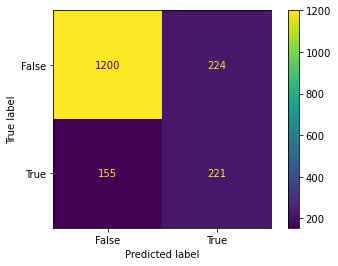

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels = [False, True])
plt.show()

## Tuning Parameter KNeighborsClassifier

In [97]:
kn_param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [98]:
knn = KNeighborsClassifier()

In [99]:
kn_grid = GridSearchCV(knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [100]:
kn_grid.fit(X_sm_clean, y_sm)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.731 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.857 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.901 total time=   0.2s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.891 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.886 total time=   0.2s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.731 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.857 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.901 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.891 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.886 total time=   0.1s
[

[CV 3/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.901 total time=   0.2s
[CV 4/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.899 total time=   0.2s
[CV 5/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.899 total time=   0.2s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.711 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.863 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.894 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.892 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.896 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.738 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.867 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=dista

[CV 5/5] END algorithm=auto, n_neighbors=18, weights=uniform;, score=0.898 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.731 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.871 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.897 total time=   0.5s
[CV 4/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.894 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.902 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.728 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.859 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.885 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.877 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=19, weights=un

[CV 2/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.854 total time=   0.4s
[CV 3/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.883 total time=   0.4s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.876 total time=   0.4s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.885 total time=   0.4s
[CV 1/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.737 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.865 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.895 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.888 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.896 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.721 total time=   0.4s
[CV 2/5] END algorithm=auto, n_neighbors=28, weights=un

[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.862 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.919 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.899 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.896 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.703 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.852 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.904 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.895 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.894 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.735 total time=   0.3s
[CV 2/5] END al

[CV 5/5] END algorithm=ball_tree, n_neighbors=13, weights=distance;, score=0.905 total time=   0.8s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.712 total time=   0.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.861 total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.887 total time=   0.8s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.890 total time=   1.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.899 total time=   1.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.730 total time=   0.9s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.868 total time=   0.7s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.904 total time=   0.7s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.897 total time=   0.8s
[CV 5

[CV 3/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.887 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.882 total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.888 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.736 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.863 total time=   0.5s
[CV 3/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.895 total time=   0.5s
[CV 4/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.894 total time=   0.5s
[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.897 total time=   0.5s
[CV 1/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.729 total time=   0.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.859 total time=   0.8s
[CV 3

[CV 1/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.733 total time=   0.5s
[CV 2/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.863 total time=   0.5s
[CV 3/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.894 total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.888 total time=   0.9s
[CV 5/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.899 total time=   0.7s
[CV 1/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.731 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.857 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.901 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.891 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.886 total time=   0.1s
[CV 1/5] END algorit

[CV 1/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.733 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.858 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.892 total time=   0.4s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.887 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.892 total time=   0.3s
[CV 1/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.744 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.865 total time=   0.4s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.901 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.899 total time=   0.4s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.899 total time=   0.3s
[CV 1/5] END algorithm=kd_tree, n_n

[CV 1/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.730 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.871 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.899 total time=   0.4s
[CV 4/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.893 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.904 total time=   0.3s
[CV 1/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.718 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.859 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.891 total time=   0.4s
[CV 4/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.880 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.898 total time=   0.4s
[CV 1/5] END algorithm=kd

[CV 1/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.721 total time=   0.4s
[CV 2/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.857 total time=   0.4s
[CV 3/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.886 total time=   0.5s
[CV 4/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.884 total time=   0.4s
[CV 5/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.892 total time=   0.4s
[CV 1/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.738 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.867 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.894 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.891 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.898 total time=   0.5s
[CV 1/5] END algorithm=kd

[CV 2/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.863 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.915 total time=   0.6s
[CV 4/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.899 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.894 total time=   0.6s
[CV 1/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.726 total time=   0.5s
[CV 2/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.855 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.911 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.890 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.890 total time=   0.6s
[CV 1/5] END algorithm=brute, n_neighbors=5, weights=distance;, score=0.738 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=5, weights=di

[CV 4/5] END algorithm=brute, n_neighbors=13, weights=uniform;, score=0.884 total time=   0.6s
[CV 5/5] END algorithm=brute, n_neighbors=13, weights=uniform;, score=0.895 total time=   0.6s
[CV 1/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.736 total time=   0.5s
[CV 2/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.868 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.900 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.896 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.905 total time=   0.5s
[CV 1/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.712 total time=   0.5s
[CV 2/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.861 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.887 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=14,

[CV 5/5] END algorithm=brute, n_neighbors=21, weights=distance;, score=0.899 total time=   1.1s
[CV 1/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.719 total time=   1.2s
[CV 2/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.859 total time=   1.5s
[CV 3/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.887 total time=   1.2s
[CV 4/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.882 total time=   1.5s
[CV 5/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.888 total time=   1.2s
[CV 1/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.736 total time=   1.2s
[CV 2/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.863 total time=   1.6s
[CV 3/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.895 total time=   1.0s
[CV 4/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.894 total time=   1.0s
[CV 5/5] END algorithm=brute, n_neighbors=22,

[CV 1/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.733 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.863 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.894 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.888 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.899 total time=   0.5s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [101]:
print(kn_grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}


In [102]:
# Refit the KNeighborsRegressor
kn_grid = KNeighborsClassifier(n_neighbors = kn_grid.best_params_["n_neighbors"],
                               weights = kn_grid.best_params_["weights"],
                               algorithm = kn_grid.best_params_["algorithm"]
                              )

In [103]:
kn_grid.fit(X_sm_clean, y_sm)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [104]:
knn_cvpred = kn_grid.predict(X_test_clean)

In [105]:
print(classification_report(y_test, knn_cvpred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1424
           1       0.50      0.60      0.55       376

    accuracy                           0.79      1800
   macro avg       0.70      0.72      0.71      1800
weighted avg       0.81      0.79      0.80      1800



In [106]:
print(f"Training Data Score: {kn_grid.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {kn_grid.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {kn_grid.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.795
Testing Data Score: 0.7933333333333333


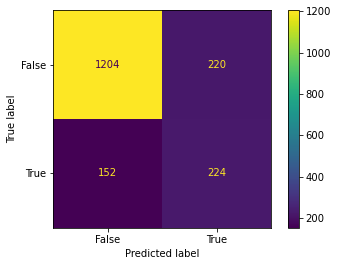

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_cvpred, display_labels = [False, True])
plt.show()

### Bagging Classifier

In [108]:
dec_tree = DecisionTreeClassifier(random_state=123)

In [109]:
bagging_cls = BaggingClassifier(base_estimator=dec_tree, n_estimators=10, random_state=123)

In [110]:
# fit KNeighborsRegressor
bagging_cls.fit(X_sm_clean, y_sm)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),
                  random_state=123)

In [111]:
bagging_cls.score(X_sm_clean, y_sm)

0.9904813218390804

In [112]:
bagging_predict = bagging_cls.predict(X_test_clean)

In [113]:
print(classification_report(y_test, bagging_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1424
           1       0.58      0.60      0.59       376

    accuracy                           0.83      1800
   macro avg       0.74      0.74      0.74      1800
weighted avg       0.83      0.83      0.83      1800



In [114]:
print(f"Training Data Score: {bagging_cls.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {bagging_cls.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cls.score(X_test_clean, y_test)}")

Training Data Score: 0.9904813218390804
Validating Data Score: 0.8475
Testing Data Score: 0.8272222222222222


## Tuning Parameter Bagging Classifier

In [115]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
bagging_param_grid = {'n_estimators' : [10, 100, 1000]}

In [116]:
bagging_grid_cv = GridSearchCV(estimator=BaggingClassifier(random_state=123), 
                               param_grid=bagging_param_grid, 
                               n_jobs=-1, 
                               cv=cv, 
                               scoring='accuracy',
                               error_score=0)

In [117]:
bagging_grid_cv.fit(X_sm_clean, y_sm)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=123),
             error_score=0, estimator=BaggingClassifier(random_state=123),
             n_jobs=-1, param_grid={'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [118]:
bagging_grid_cv.best_params_

{'n_estimators': 1000}

In [119]:
bagging_cv  = BaggingClassifier(n_estimators = bagging_grid_cv.best_params_["n_estimators"])

In [120]:
bagging_cv.fit(X_sm_clean, y_sm)

BaggingClassifier(n_estimators=1000)

In [121]:
baggingcv_predict = bagging_cv.predict(X_test_clean)

In [122]:
print(classification_report(y_test, baggingcv_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1424
           1       0.60      0.65      0.62       376

    accuracy                           0.83      1800
   macro avg       0.75      0.77      0.76      1800
weighted avg       0.84      0.83      0.84      1800



In [123]:
print(f"Training Data Score: {bagging_cv.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {bagging_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cv.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8491666666666666
Testing Data Score: 0.835


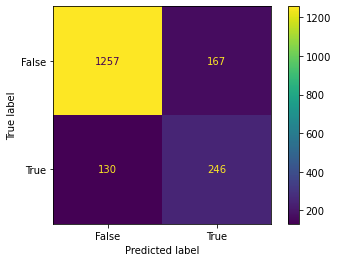

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test, baggingcv_predict, display_labels = [False, True])
plt.show()

## Gradient Boosting

In [125]:
# Build GradientBoosting
grad_boost = GradientBoostingClassifier(random_state = 123)

In [126]:
# Fit GradientBoosting
grad_boost.fit(X_sm_clean, y_sm)

GradientBoostingClassifier(random_state=123)

In [127]:
grad_boost.score(X_sm_clean, y_sm)

0.8839798850574713

In [128]:
gradboost_predict = grad_boost.predict(X_test_clean)

In [129]:
print(classification_report(y_test, gradboost_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1424
           1       0.60      0.66      0.63       376

    accuracy                           0.84      1800
   macro avg       0.76      0.77      0.76      1800
weighted avg       0.84      0.84      0.84      1800



In [130]:
print(f"Training Data Score: {grad_boost.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {grad_boost.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {grad_boost.score(X_test_clean, y_test)}")

Training Data Score: 0.8839798850574713
Validating Data Score: 0.8491666666666666
Testing Data Score: 0.8388888888888889


### Tuning Parameter Gradient Boosting

In [131]:
grad_param_grid = {
    'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9]
}

In [132]:
grad_grid_cv = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=grad_param_grid,
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)

In [133]:
grad_grid_cv.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5, error_score=0, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [134]:
grad_grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 1.0}

In [135]:
gradboost_cv  = GradientBoostingClassifier(n_estimators = grad_grid_cv.best_params_["n_estimators"],
                                           learning_rate = grad_grid_cv.best_params_["learning_rate"],
                                           subsample = grad_grid_cv.best_params_["subsample"],
                                           max_depth = grad_grid_cv.best_params_["max_depth"],
                                           random_state = 123)

In [136]:
gradboost_cv.fit(X_sm_clean, y_sm)

GradientBoostingClassifier(max_depth=9, random_state=123)

In [137]:
gradboost_pred_cv = gradboost_cv.predict(X_test_clean)

In [138]:
print(classification_report(y_test, gradboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1424
           1       0.63      0.65      0.64       376

    accuracy                           0.85      1800
   macro avg       0.77      0.77      0.77      1800
weighted avg       0.85      0.85      0.85      1800



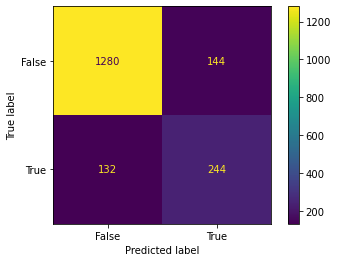

In [139]:
ConfusionMatrixDisplay.from_predictions(y_test, gradboost_pred_cv, display_labels = [False, True])
plt.show()

## Adaboost Classifier

### Adaboost SVC

In [140]:
svc = SVC(probability=True, kernel='linear', random_state = 123)

# Create adaboost classifer object
adaboost_svc = AdaBoostClassifier(n_estimators=50, 
                                  base_estimator=svc,
                                  learning_rate=1)

In [141]:
# Train Adaboost Classifer
adaboost_svc.fit(X_sm_clean, y_sm)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                      random_state=123),
                   learning_rate=1)

In [142]:
adaboost_svc.score(X_sm_clean, y_sm)

0.6376616379310345

In [143]:
ada_predict = adaboost_svc.predict(X_test_clean)

In [144]:
print(classification_report(y_test, ada_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.49      0.63      1424
           1       0.26      0.68      0.38       376

    accuracy                           0.53      1800
   macro avg       0.56      0.59      0.50      1800
weighted avg       0.73      0.53      0.57      1800



In [145]:
print(f"Training Data Score: {adaboost_svc.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {adaboost_svc.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_svc.score(X_test_clean, y_test)}")

Training Data Score: 0.6376616379310345
Validating Data Score: 0.5116666666666667
Testing Data Score: 0.5327777777777778


### Adaboost Original

In [146]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state = 123)

In [147]:
# Train Adaboost Classifer
abc_ori = abc.fit(X_sm_clean, y_sm)

In [148]:
abc_ori.score(X_sm_clean, y_sm)

0.8624281609195402

In [149]:
adaboost_pred_ori = abc_ori.predict(X_test_clean)

In [150]:
print(classification_report(y_test, adaboost_pred_ori, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1424
           1       0.55      0.70      0.62       376

    accuracy                           0.82      1800
   macro avg       0.73      0.77      0.75      1800
weighted avg       0.84      0.82      0.82      1800



In [151]:
print(f"Training Data Score: {abc_ori.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {abc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {abc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.8624281609195402
Validating Data Score: 0.8283333333333334
Testing Data Score: 0.8172222222222222


## Tuning Parameter Adaboost

In [152]:
adaboost = AdaBoostClassifier(random_state = 123)

In [153]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [154]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid, scoring='accuracy', cv=5)

In [155]:
grid_search_adaboost.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [156]:
print(grid_search_adaboost.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}


In [157]:
adaboost_best = AdaBoostClassifier(n_estimators = grid_search_adaboost.best_params_["n_estimators"],
                                   learning_rate = grid_search_adaboost.best_params_["learning_rate"],
                                   algorithm = grid_search_adaboost.best_params_["algorithm"]
                                  )

In [158]:
adaboost_best.fit(X_sm_clean, y_sm)

AdaBoostClassifier(n_estimators=200)

In [159]:
adaboost_pred_cv = adaboost_best.predict(X_test_clean)

In [160]:
print(classification_report(y_test, adaboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1424
           1       0.57      0.66      0.61       376

    accuracy                           0.82      1800
   macro avg       0.74      0.76      0.75      1800
weighted avg       0.84      0.82      0.83      1800



In [161]:
print(f"Training Data Score: {adaboost_best.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {adaboost_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_best.score(X_test_clean, y_test)}")

Training Data Score: 0.8708692528735632
Validating Data Score: 0.8458333333333333
Testing Data Score: 0.8244444444444444


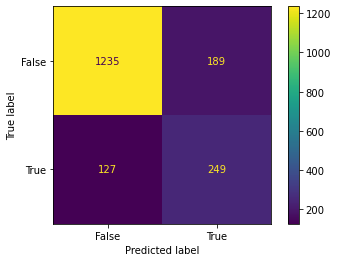

In [162]:
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_pred_cv, display_labels = [False, True])
plt.show()

## Extratrees Classifier

In [163]:
extra_trees_awal = ExtraTreesClassifier(random_state = 123)

In [164]:
extra_trees_awal.fit(X_sm_clean, y_sm)

ExtraTreesClassifier(random_state=123)

In [165]:
extra_trees_awal.score(X_sm_clean, y_sm)

1.0

In [166]:
y_extratress_pred = extra_trees_awal.predict(X_test_clean)

In [167]:
print(classification_report(y_test, y_extratress_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1424
           1       0.61      0.57      0.59       376

    accuracy                           0.83      1800
   macro avg       0.75      0.74      0.74      1800
weighted avg       0.83      0.83      0.83      1800



In [168]:
print(f"Training Data Score: {extra_trees_awal.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {extra_trees_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_awal.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8583333333333333
Testing Data Score: 0.8338888888888889


## Tuning Parameter Extratrees Classifier

In [169]:
extra_trees = ExtraTreesClassifier(random_state = 123)

In [170]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [171]:
grid_search_et = GridSearchCV(extra_trees, param_grid, scoring='accuracy', cv=5)

In [172]:
grid_search_et.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=123),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [173]:
print(grid_search_et.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [174]:
extra_trees_best = ExtraTreesClassifier(n_estimators = grid_search_et.best_params_["n_estimators"], 
                                        max_depth = grid_search_et.best_params_["max_depth"], 
                                        min_samples_split= grid_search_et.best_params_["min_samples_split"], 
                                        min_samples_leaf=grid_search_et.best_params_["min_samples_leaf"])

In [175]:
extra_trees_best.fit(X_sm_clean, y_sm)

ExtraTreesClassifier(max_depth=20, n_estimators=200)

In [176]:
extratreescv_pred = extra_trees_best.predict(X_test_clean)

In [177]:
print(classification_report(y_test, extratreescv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1424
           1       0.63      0.59      0.61       376

    accuracy                           0.84      1800
   macro avg       0.76      0.75      0.76      1800
weighted avg       0.84      0.84      0.84      1800



In [178]:
print(f"Training Data Score: {extra_trees_best.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {extra_trees_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_best.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8608333333333333
Testing Data Score: 0.8416666666666667


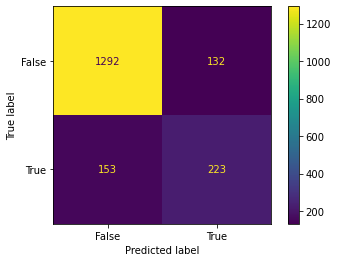

In [179]:
ConfusionMatrixDisplay.from_predictions(y_test, extratreescv_pred, display_labels = [False, True])
plt.show()

## XGboost Classifier

In [180]:
xgb_classifier = xgb.XGBClassifier(random_state = 123)

In [181]:
xgb_classifier.fit(X_sm_clean, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [182]:
xgb_classifier.score(X_sm_clean, y_sm)

0.970007183908046

In [183]:
xgb_pred = xgb_classifier.predict(X_test_clean)

In [184]:
print(classification_report(y_test, xgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1424
           1       0.62      0.68      0.65       376

    accuracy                           0.84      1800
   macro avg       0.77      0.79      0.77      1800
weighted avg       0.85      0.84      0.85      1800



In [185]:
print(f"Training Data Score: {xgb_classifier.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {xgb_classifier.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {xgb_classifier.score(X_test_clean, y_test)}")

Training Data Score: 0.970007183908046
Validating Data Score: 0.8441666666666666
Testing Data Score: 0.845


## Tuning Parameter XGboost

In [186]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}


In [187]:
grid_search_xg = GridSearchCV(xgb_classifier, param_grid, scoring='accuracy', cv=5)

In [188]:
grid_search_xg.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [189]:
print(grid_search_xg.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [190]:
xgb_best = xgb.XGBClassifier(n_estimators = grid_search_xg.best_params_["n_estimators"], 
                             max_depth = grid_search_xg.best_params_["max_depth"], 
                             learning_rate = grid_search_xg.best_params_["learning_rate"], 
                             subsample = grid_search_xg.best_params_["subsample"])

In [191]:
xgb_best.fit(X_sm_clean, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [192]:
xgboost_cv_pred = xgb_best.predict(X_test_clean)

In [193]:
print(classification_report(y_test, xgboost_cv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1424
           1       0.63      0.68      0.65       376

    accuracy                           0.85      1800
   macro avg       0.77      0.79      0.78      1800
weighted avg       0.85      0.85      0.85      1800



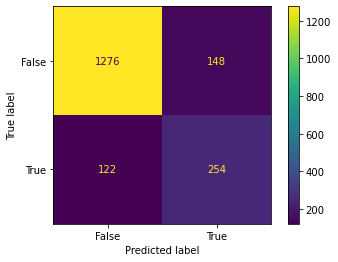

In [194]:
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_cv_pred, display_labels = [False, True])
plt.show()

## Deep Learning

In [195]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [196]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [197]:
history = model.fit(X_sm_clean, y_sm, epochs=500, batch_size=32, validation_data=(X_valid_clean, y_valid))

Epoch 1/500
348/348 [==============================] - 10s 4ms/step - loss: 0.5246 - accuracy: 0.7468 - val_loss: 0.4595 - val_accuracy: 0.7933
Epoch 2/500
348/348 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.8063 - val_loss: 0.4601 - val_accuracy: 0.7933
Epoch 3/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8316 - val_loss: 0.4154 - val_accuracy: 0.8167
Epoch 4/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8361 - val_loss: 0.4315 - val_accuracy: 0.8067
Epoch 5/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8442 - val_loss: 0.3958 - val_accuracy: 0.8225
Epoch 6/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8507 - val_loss: 0.4229 - val_accuracy: 0.8100
Epoch 7/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.8559 - val_loss: 0.3721 - val_accuracy: 0.853

Epoch 58/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.8841 - val_loss: 0.3687 - val_accuracy: 0.8575
Epoch 59/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.8835 - val_loss: 0.3633 - val_accuracy: 0.8592
Epoch 60/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.8842 - val_loss: 0.3886 - val_accuracy: 0.8458
Epoch 61/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2625 - accuracy: 0.8838 - val_loss: 0.3643 - val_accuracy: 0.8558
Epoch 62/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2635 - accuracy: 0.8815 - val_loss: 0.3843 - val_accuracy: 0.8442
Epoch 63/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2605 - accuracy: 0.8837 - val_loss: 0.3749 - val_accuracy: 0.8517
Epoch 64/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2612 - accuracy: 0.8841 - val_loss: 0.3657 - val_accuracy:

Epoch 115/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2488 - accuracy: 0.8910 - val_loss: 0.3804 - val_accuracy: 0.8508
Epoch 116/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.8896 - val_loss: 0.3713 - val_accuracy: 0.8625
Epoch 117/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.8928 - val_loss: 0.3739 - val_accuracy: 0.8608
Epoch 118/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.8925 - val_loss: 0.3733 - val_accuracy: 0.8608
Epoch 119/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.8904 - val_loss: 0.3808 - val_accuracy: 0.8533
Epoch 120/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.8883 - val_loss: 0.3745 - val_accuracy: 0.8583
Epoch 121/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2526 - accuracy: 0.8923 - val_loss: 0.3782 - val_ac

348/348 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.8935 - val_loss: 0.3737 - val_accuracy: 0.8608
Epoch 172/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.8958 - val_loss: 0.3765 - val_accuracy: 0.8542
Epoch 173/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2430 - accuracy: 0.8948 - val_loss: 0.3722 - val_accuracy: 0.8592
Epoch 174/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2416 - accuracy: 0.8943 - val_loss: 0.3754 - val_accuracy: 0.8625
Epoch 175/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2409 - accuracy: 0.8940 - val_loss: 0.3679 - val_accuracy: 0.8683
Epoch 176/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2408 - accuracy: 0.8932 - val_loss: 0.3820 - val_accuracy: 0.8592
Epoch 177/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2417 - accuracy: 0.8957 - val_loss: 0.3762 - val_accuracy: 0.8625

348/348 [==============================] - 1s 2ms/step - loss: 0.2372 - accuracy: 0.8959 - val_loss: 0.3861 - val_accuracy: 0.8550
Epoch 228/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2348 - accuracy: 0.8978 - val_loss: 0.3850 - val_accuracy: 0.8550
Epoch 229/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2377 - accuracy: 0.8969 - val_loss: 0.3814 - val_accuracy: 0.8617
Epoch 230/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2352 - accuracy: 0.8977 - val_loss: 0.3991 - val_accuracy: 0.8500
Epoch 231/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2392 - accuracy: 0.8991 - val_loss: 0.3837 - val_accuracy: 0.8583
Epoch 232/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2359 - accuracy: 0.8976 - val_loss: 0.3861 - val_accuracy: 0.8625
Epoch 233/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2365 - accuracy: 0.9001 - val_loss: 0.3819 - val_accuracy: 0.8567

348/348 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.8972 - val_loss: 0.3920 - val_accuracy: 0.8475
Epoch 284/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2315 - accuracy: 0.8988 - val_loss: 0.3849 - val_accuracy: 0.8583
Epoch 285/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2357 - accuracy: 0.8998 - val_loss: 0.3817 - val_accuracy: 0.8625
Epoch 286/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2318 - accuracy: 0.8990 - val_loss: 0.3818 - val_accuracy: 0.8575
Epoch 287/500
348/348 [==============================] - 1s 3ms/step - loss: 0.2396 - accuracy: 0.8978 - val_loss: 0.3809 - val_accuracy: 0.8583
Epoch 288/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2299 - accuracy: 0.9016 - val_loss: 0.3886 - val_accuracy: 0.8592
Epoch 289/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2322 - accuracy: 0.8977 - val_loss: 0.3858 - val_accuracy: 0.8575

348/348 [==============================] - 1s 2ms/step - loss: 0.2296 - accuracy: 0.9008 - val_loss: 0.3861 - val_accuracy: 0.8567
Epoch 340/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2293 - accuracy: 0.9030 - val_loss: 0.4047 - val_accuracy: 0.8483
Epoch 341/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2279 - accuracy: 0.9027 - val_loss: 0.3867 - val_accuracy: 0.8583
Epoch 342/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9019 - val_loss: 0.3897 - val_accuracy: 0.8608
Epoch 343/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9023 - val_loss: 0.3878 - val_accuracy: 0.8583
Epoch 344/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2303 - accuracy: 0.8989 - val_loss: 0.3896 - val_accuracy: 0.8592
Epoch 345/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2322 - accuracy: 0.9002 - val_loss: 0.3963 - val_accuracy: 0.8508

348/348 [==============================] - 1s 3ms/step - loss: 0.2317 - accuracy: 0.8990 - val_loss: 0.4076 - val_accuracy: 0.8492
Epoch 396/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2246 - accuracy: 0.9036 - val_loss: 0.3859 - val_accuracy: 0.8583
Epoch 397/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2289 - accuracy: 0.9033 - val_loss: 0.4019 - val_accuracy: 0.8592
Epoch 398/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9031 - val_loss: 0.4043 - val_accuracy: 0.8608
Epoch 399/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9025 - val_loss: 0.3915 - val_accuracy: 0.8600
Epoch 400/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2299 - accuracy: 0.9013 - val_loss: 0.3969 - val_accuracy: 0.8575
Epoch 401/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2251 - accuracy: 0.9007 - val_loss: 0.3896 - val_accuracy: 0.8508

348/348 [==============================] - 1s 2ms/step - loss: 0.2260 - accuracy: 0.9018 - val_loss: 0.4074 - val_accuracy: 0.8542
Epoch 452/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9039 - val_loss: 0.4100 - val_accuracy: 0.8542
Epoch 453/500
348/348 [==============================] - 1s 3ms/step - loss: 0.2282 - accuracy: 0.9008 - val_loss: 0.4030 - val_accuracy: 0.8625
Epoch 454/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2198 - accuracy: 0.9027 - val_loss: 0.4061 - val_accuracy: 0.8558
Epoch 455/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2258 - accuracy: 0.9002 - val_loss: 0.3969 - val_accuracy: 0.8625
Epoch 456/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2238 - accuracy: 0.9027 - val_loss: 0.4170 - val_accuracy: 0.8492
Epoch 457/500
348/348 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.9001 - val_loss: 0.4128 - val_accuracy: 0.8492

In [198]:
deep_pred = np.argmax(model.predict(X_valid_clean), axis=-1)
accuracy = accuracy_score(y_valid, deep_pred)
print("Accuracy:", accuracy)

38/38 [==============================] - 0s 2ms/step
Accuracy: 0.8091666666666667


In [199]:
deep_pred = np.argmax(model.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 1ms/step
Accuracy: 0.7911111111111111


In [200]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



## Tuning Parameter Deep Learning

In [201]:
def create_model(units=64, layers=2, dropout=0.2):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(13,)))
    model.add(Dropout(dropout))
    for i in range(layers-1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [202]:
model = KerasClassifier(build_fn=create_model)

In [203]:
param_grid = {
    'units': [32, 64, 128],
    'layers': [2, 3, 4],
    'dropout': [0.2, 0.3, 0.4]
}

In [204]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [205]:
grid_result = grid.fit(X_sm_clean, y_sm)

279/279 [==============================] - 1s 2ms/step - loss: 0.6200 - accuracy: 0.6608


70/70 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.6906


348/348 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.7784


In [206]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.810974 using {'dropout': 0.2, 'layers': 3, 'units': 128}


In [207]:
deep_pred = np.argmax(grid_result.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 1ms/step
Accuracy: 0.7911111111111111


In [208]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



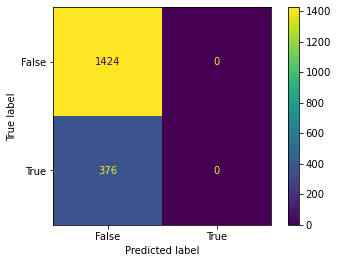

In [209]:
ConfusionMatrixDisplay.from_predictions(y_test, deep_pred, display_labels = [False, True])
plt.show()

## LightGBM

In [210]:
# define the LightGBM classifier
lgb_awal = LGBMClassifier(random_state = 123)

In [211]:
lgb_awal.fit(X_sm_clean, y_sm)

LGBMClassifier(random_state=123)

In [212]:
# train the classifier
lgb_awal.score(X_sm_clean, y_sm)

0.9289691091954023

In [213]:
# make predictions on the testing set
lgb_pred = lgb_awal.predict(X_test_clean)

In [214]:
print(f"Training Data Score: {lgb_awal.score(X_sm_clean, y_sm)}")
print(f"Validating Data Score: {lgb_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lgb_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.9289691091954023
Validating Data Score: 0.8533333333333334
Testing Data Score: 0.8477777777777777


In [215]:
print(classification_report(y_test, lgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1424
           1       0.63      0.67      0.65       376

    accuracy                           0.85      1800
   macro avg       0.77      0.78      0.77      1800
weighted avg       0.85      0.85      0.85      1800



## Tuning Parameter LightGBM

In [216]:
# define the LightGBM classifier
lgb = LGBMClassifier()

In [217]:
# define the hyperparameters to tune
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [218]:
# create the grid search object
grid_search_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=5)

In [219]:
# train the grid search object
grid_search_lgb.fit(X_sm_clean, y_sm)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'num_leaves': [10, 20, 30]})

In [220]:
best_params = grid_search_lgb.best_params_

In [221]:
lgbm_best = LGBMClassifier(**best_params)

In [222]:
lgbm_best.fit(X_sm_clean, y_sm)

LGBMClassifier(max_depth=5, num_leaves=30)

In [223]:
lgb_best_pred = lgbm_best.predict(X_test_clean)

In [224]:
print(classification_report(y_test, lgb_best_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1424
           1       0.61      0.68      0.64       376

    accuracy                           0.84      1800
   macro avg       0.76      0.78      0.77      1800
weighted avg       0.85      0.84      0.85      1800



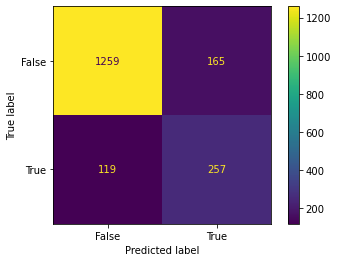

In [225]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_best_pred, display_labels = [False, True])
plt.show()

In [226]:
# evaluate the classifier using accuracy score and ROC AUC score
acc = accuracy_score(y_test, lgb_best_pred)
roc_auc = roc_auc_score(y_test, lgb_best_pred)
print('Accuracy:', acc)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8422222222222222
ROC AUC score: 0.7838199258905092


In [227]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {'Logistic Regression': logreg_awal, 
          'Logistic Regression CV': lr_grid_cv,
          'Decision Tree': decTree, 
          'Decision Tree CV': best_decTree,
          'Support Vector Classifier':svc_ori,
          'Support Vector Classifier CV':svc_grid_cv,
          'Random Forest':random_forest,
          'Random Forest CV':random_forestcls_cv,
          'Ridge':ridge,
          'Ridge CV':ridge_cv,
          'KNN':knn_awal,
          'KNN CV':kn_grid,
          'Bagging':bagging_cls,
          'Bagging CV':bagging_cv,
          'gradient Boosting':grad_boost,
          'gradient Boosting CV':gradboost_cv,
          'Adaboost':abc_ori,
          'Adaboost SVC':adaboost_svc,
          'Adaboost CV':adaboost_best,
          'Extratrees':extra_trees_awal,
          'Extratrees CV':extra_trees_best,
          'XGboost':xgb_classifier,
          'XGboost CV':xgb_best,
          'LightGBM':lgb_awal,
          'LightGBM CV':lgbm_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
print(df_results)

                              precision    recall  f1_score  accuracy  \
Logistic Regression            0.785177  0.789444  0.787191  0.789444   
Logistic Regression CV         0.785915  0.790556  0.788091  0.790556   
Decision Tree                  0.805567  0.777778  0.788181  0.777778   
Decision Tree CV               0.827719  0.811111  0.817597  0.811111   
Support Vector Classifier      0.835026  0.837778  0.836298  0.837778   
Support Vector Classifier CV   0.837735  0.841667  0.839462  0.841667   
Random Forest                  0.829060  0.809444  0.816843  0.809444   
Random Forest CV               0.841739  0.836667  0.838930  0.836667   
Ridge                          0.782002  0.791111  0.785966  0.791111   
Ridge CV                       0.782002  0.791111  0.785966  0.791111   
KNN                            0.804355  0.789444  0.795678  0.789444   
KNN CV                         0.807817  0.793333  0.799375  0.793333   
Bagging                        0.828420  0.827222  

In [228]:
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
Logistic Regression,0.785177,0.789444,0.787191,0.789444,0.678683,0.671191,0.674715,0.785177,0.789444,0.787191
Logistic Regression CV,0.785915,0.790556,0.788091,0.790556,0.680183,0.671894,0.675770,0.785915,0.790556,0.788091
Decision Tree,0.805567,0.777778,0.788181,0.777778,0.684222,0.722538,0.697328,0.805567,0.777778,0.788181
Decision Tree CV,0.827719,0.811111,0.817597,0.811111,0.721588,0.754370,0.734702,0.827719,0.811111,0.817597
Support Vector Classifier,0.835026,0.837778,0.836298,0.837778,0.754914,0.745779,0.750148,0.835026,0.837778,0.836298
Support Vector Classifier CV,0.837735,0.841667,0.839462,0.841667,0.761430,0.747258,0.753883,0.837735,0.841667,0.839462
Random Forest,0.829060,0.809444,0.816843,0.809444,0.720864,0.758210,0.735225,0.829060,0.809444,0.816843
Random Forest CV,0.841739,0.836667,0.838930,0.836667,0.753147,0.767586,0.759856,0.841739,0.836667,0.838930
Ridge,0.782002,0.791111,0.785966,0.791111,0.678231,0.661480,0.668749,0.782002,0.791111,0.785966
Ridge CV,0.782002,0.791111,0.785966,0.791111,0.678231,0.661480,0.668749,0.782002,0.791111,0.785966


# Save Model

## Logistic Regression

In [229]:
logreg = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/logreg.pkl'
with open(logreg, 'wb') as file:
    pickle.dump(logreg_awal, file)
    
logreg_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/logreg_cv.pkl'
with open(logreg_cv, 'wb') as file:
    pickle.dump(lr_grid_cv, file)

## Support Vector Classifier

In [230]:
svc = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/svc.pkl'
with open(svc, 'wb') as file:
    pickle.dump(svc_ori, file)
    
svc_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/svc_cv.pkl'
with open(svc_cv, 'wb') as file:
    pickle.dump(svc_grid_cv, file)

## Decisiontree

In [231]:
dectree = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/dectree.pkl'
with open(dectree, 'wb') as file:
    pickle.dump(decTree, file)
    
dectree_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/dectree_cv.pkl'
with open(dectree_cv, 'wb') as file:
    pickle.dump(best_decTree, file)

## Randomforest

In [232]:
randomforest = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/randomforest.pkl'
with open(randomforest, 'wb') as file:
    pickle.dump(random_forest, file)
    
randomforest_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/randomforest_cv.pkl'
with open(randomforest_cv, 'wb') as file:
    pickle.dump(random_forestcls_cv, file)

## Ridge Classifier

In [233]:
ridge = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/ridge.pkl'
with open(ridge, 'wb') as file:
    pickle.dump(ridge, file)
    
ridge_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/ridge_cv.pkl'
with open(ridge_cv, 'wb') as file:
    pickle.dump(ridge_cv, file)

## KNN 

In [234]:
knn = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/knn.pkl'
with open(knn, 'wb') as file:
    pickle.dump(knn_awal, file)
    
knn_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/knn_cv.pkl'
with open(knn_cv, 'wb') as file:
    pickle.dump(kn_grid, file)

## Bagging Classifier

In [235]:
bagging = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/bagging.pkl'
with open(bagging, 'wb') as file:
    pickle.dump(bagging_cls, file)
    
bagging_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/bagging_cv.pkl'
with open(bagging_cv, 'wb') as file:
    pickle.dump(bagging_cv, file)

## Gradient Boosting

In [236]:
grad_boost = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/grad_boost.pkl'
with open(grad_boost, 'wb') as file:
    pickle.dump(grad_boost, file)
    
grad_boost_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/grad_boost_cv.pkl'
with open(grad_boost_cv, 'wb') as file:
    pickle.dump(gradboost_cv, file)

## Adaboost

In [237]:
adaboost_svc = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/adaboost_svc.pkl'
with open(adaboost_svc, 'wb') as file:
    pickle.dump(adaboost_svc, file)
    
adaboost_ori = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/adaboost_ori.pkl'
with open(adaboost_ori, 'wb') as file:
    pickle.dump(abc_ori, file)
    
adaboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/adaboost_cv.pkl'
with open(adaboost_cv, 'wb') as file:
    pickle.dump(adaboost_best, file)

## Extratrees

In [238]:
extra_trees = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/extra_trees.pkl'
with open(extra_trees, 'wb') as file:
    pickle.dump(extra_trees_awal, file)
    
extra_tree_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/extra_tree_cv.pkl'
with open(extra_tree_cv, 'wb') as file:
    pickle.dump(extra_trees_best, file)

## XgBoost

In [239]:
xgboost = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/xgboost.pkl'
with open(xgboost, 'wb') as file:
    pickle.dump(xgb_classifier, file)
    
xgboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/xgboost_cv.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(xgb_best, file)

## Deep Learning

In [240]:
deep_learning = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/deep_learning.pkl'
with open(deep_learning, 'wb') as file:
    pickle.dump(model, file)
    
    
deep_learning_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/deep_learning_cv.pkl'
with open(deep_learning_cv, 'wb') as file:
    pickle.dump(grid_result, file)

INFO:tensorflow:Assets written to: C:\Users\HALAL\AppData\Local\Temp\tmp0mc4525j\assets


## LightGBM

In [241]:
lgbm = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/lgbm.pkl'
with open(lgbm, 'wb') as file:
    pickle.dump(lgb_awal, file)
    
lgbm_cv = 'C:/Users/HALAL/Final Project ML Process/model/4 - Model SMOTE/lgbm_cv.pkl'
with open(lgbm_cv, 'wb') as file:
    pickle.dump(lgbm_best, file)

In [242]:
X_sm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11136 entries, 0 to 11135
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        11136 non-null  float64
 1   Age                11136 non-null  float64
 2   Tenure             11136 non-null  float64
 3   EstimatedSalary    11136 non-null  float64
 4   Balance            11136 non-null  float64
 5   NumOfProducts      11136 non-null  int64  
 6   IsActiveMember     11136 non-null  int64  
 7   HasCrCard          11136 non-null  int64  
 8   Geography_France   11136 non-null  uint8  
 9   Geography_Germany  11136 non-null  uint8  
 10  Geography_Spain    11136 non-null  uint8  
 11  Gender_Female      11136 non-null  uint8  
 12  Gender_Male        11136 non-null  uint8  
dtypes: float64(5), int64(3), uint8(5)
memory usage: 750.5 KB


## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"